In [ ]:
import pandas as pd
#import train and test data from D:\MIT\Texephyr\datasets
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np



In [ ]:
df=pd.read_csv('train.csv')

df_copy=df.copy()


#Y_pred=pd.read_csv('test.csv')

#Y_pred.drop('6',1)

#df=df.drop('6',1)

df.sample(10)

,Target,13,41,63,69,22,112,89,94,58,...,2,20,38,95,53,109,73,10,29,114
101739,5,38.0,20,0,38,1.788920e+05,76.566618,-319,-45,118.500000,...,60782,1112.403014,0,3,0,65.988975,-1,38.0,0.0,32.42317
104441,5,2.0,84,0,53,1.189085e+05,76.566618,-92,-85,7.857143,...,443,74.286812,0,202,1,65.988975,7480,53.0,299749.0,32.42317
70681,5,0.0,108,0,0,1.042007e+06,76.566618,-234,312,0.000000,...,443,0.000000,0,301,1,65.988975,1595,0.0,0.0,32.42317
101475,4,0.0,0,0,0,3.486800e+04,76.566618,143,-57,0.000000,...,32833,0.000000,0,198,1,65.988975,-1,0.0,34868.0,32.42317
69703,2,0.0,20,0,0,8.120500e+04,76.566618,-119,-197,0.000000,...,39349,0.000000,0,-113,0,65.988975,0,0.0,0.0,32.42317
78749,5,0.0,112,0,372,1.166601e+06,76.566618,-140,-475,267.900000,...,48508,255.157243,0,185,0,65.988975,511,372.0,261937.0,32.42317
35577,1,39.0,32,0,39,2.396930e+05,76.566618,-105,-386,90.500000,...,54864,592.424476,0,-320,0,65.988975,-1,39.0,0.0,32.42317
124293,3,0.0,32,0,0,5.150568e+06,76.566618,-16,320,0.000000,...,47450,0.000000,0,170,0,65.988975,14600,0.0,15215522.0,32.42317
58923,5,0.0,32,0,0,3.509000e+03,76.566618,-20,178,0.000000,...,80,0.000000,0,-10,1,65.988975,1369,0.0,0.0,32.42317
69676,4,0.0,0,0,0,8.979410e+06,76.566618,-405,-226,0.000000,...,59790,0.000000,0,-57,1,65.988975,-1,0.0,8979410.0,32.42317


In [ ]:
#preproccesing:
print(df.shape)

#nulls:
print(df.isna().sum().sum())

df['22'][0]

(138047, 115)
0


28905405.0

In [ ]:
df.astype(bool).sum(axis=0)

Target    126781
13         37398
41         98841
63             0
69         78408
           ...  
109       138047
73        135704
10         78408
29         90664
114       138047
Length: 115, dtype: int64

In [ ]:
#encoding
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['0']= label_encoder.fit_transform(df['0'])
df['1']= label_encoder.fit_transform(df['1'])
df['3']= label_encoder.fit_transform(df['3'])
df['6']= label_encoder.fit_transform(df['6'])

#df of ##### to be converted maybe


#Y_pred['0']= label_encoder.fit_transform(Y_pred['0'])
#Y_pred['1']= label_encoder.fit_transform(Y_pred['1'])
#Y_pred['3']= label_encoder.fit_transform(Y_pred['3'])



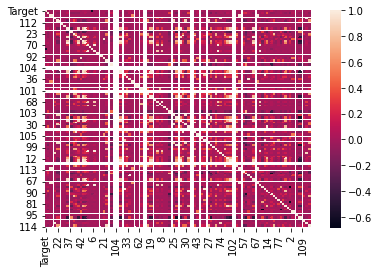

In [ ]:
#feature selection:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif

#!pip install skfeature-chappers
##############################couldnt work w fisher because not enough ram provided by colab!###############


#from skfeature.function.similarity_based import fisher_score
#score = fisher_score.fisher_score(X_train, y_train)

#print(score)

#idx = fisher_score.feature_ranking(score)
#print(idx)

#num_fea =10
#selected_features_train = X_train[:, idx[0:num_fea]]
#selected_features_test = X_test[:, idx[0:num_fea]]

#coorelation:
corr = df.corr()


sns.heatmap(corr)


In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.92:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]

df = df[selected_columns]
df.shape

(138047, 89)

In [ ]:
X= df.drop('Target',1).values
Y=df['Target'].values
from sklearn.model_selection import train_test_split #method to split training and testing data sets
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.03, random_state=42, stratify=Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
#label encoding because getting error: ValueError: could not convert string to float: '05/07/2017 10:45:41':
df.dtypes

Target      int64
13        float64
41          int64
63          int64
69          int64
           ...   
95          int64
53          int64
109       float64
73          int64
114       float64
Length: 89, dtype: object

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
#95.65 w scaling, 95.82 w/0
#1 min


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #95.447 w/o feature selection
#95.780 w 
#best 96.1466 with 0.05 test data and after removing features w correlation>=0.9
#96.2335 w corr>=0.92, 0.03=96499

Accuracy: 0.9649927571221633


# Hyperparameter tuning


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=5, min_samples_leaf=4, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

[[ 283    0    1   54    0    0]
 [   0  354    1    0   11    0]
 [   0    0  350    0    0    0]
 [  89    0    7  197    0    0]
 [   0    1    0    0  284    0]
 [   0    0    0    0    0 2510]]
0.9604056011588604


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
evaluate(best_grid,X_test,y_test)

In [ ]:
rf_random.best_params_#best parameters

In [ ]:
from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

In [ ]:
selected_columns2=[x for x in selected_columns if x!='Target']

In [ ]:
#saving the predicted values of test dataset provided by 
df_test=pd.read_csv('test.csv')
df_test.head(10)

#encoding
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_test['0']= label_encoder.fit_transform(df_test['0'])
df_test['1']= label_encoder.fit_transform(df_test['1'])
df_test['3']= label_encoder.fit_transform(df_test['3'])
df_test['6']= label_encoder.fit_transform(df_test['6'])


#change the columns/attributes:
df_test=df_test[selected_columns2]

df_test.shape

(138048, 88)

In [ ]:
pred_val=model.predict([df_test.iloc[24]])
pred_val

array([0])

In [ ]:
#pred_val=model.predict([df_test.iloc[1100]])
#pred_val
df_test.iloc[0]

predicted_values=[]

for i in range(df_test.shape[0]):
  pred_val=model.predict([df_test.iloc[i]])
  predicted_values.append(pred_val)

#29 mins

In [ ]:
(pd.DataFrame(predicted_values)).to_csv('Ayush_Shrivastav_predictions.csv', index=False)
pd.read_csv('Ayush_Shrivastav_ubmission2.csv').shape

### Naive Bayes:


In [ ]:
"""

#preprocessing:

X= df.drop('Target',1).values
Y=df['Target'].values


scaler=MinMaxScaler()

scaler.fit(X)
X=scaler.transform(X)
"""


"\n\n#preprocessing:\n\nX= df.drop('Target',1).values\nY=df['Target'].values\n\n\nscaler=MinMaxScaler()\n\nscaler.fit(X)\nX=scaler.transform(X)\n"

In [ ]:
#df=pd.DataFrame(df).head()
#df.columns=df_copy.columns

In [ ]:
"""

#for i in range(113):
#  if X_train[0][i]<0:
#    print(X_train[0][i])

#splitting:

from sklearn.model_selection import train_test_split #method to split training and testing data sets
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
"""

'\n\n#for i in range(113):\n#  if X_train[0][i]<0:\n#    print(X_train[0][i])\n\n#splitting:\n\nfrom sklearn.model_selection import train_test_split #method to split training and testing data sets\nX_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)\n'

In [ ]:
"""

from sklearn.naive_bayes import MultinomialNB # smoothing is automatically applied
model=MultinomialNB()
model.fit(X_train, y_train)
score=model.score(X_test, y_test)
print("Accuracy:", score) #60.59 
"""

'\n\nfrom sklearn.naive_bayes import MultinomialNB # smoothing is automatically applied\nmodel=MultinomialNB()\nmodel.fit(X_train, y_train)\nscore=model.score(X_test, y_test)\nprint("Accuracy:", score) #60.59 \n'

### Logistic Regression

In [ ]:
"""
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score) #65.55
"""

'\nfrom sklearn.linear_model import LogisticRegression\nmodel = LogisticRegression()\nmodel.fit(X_train, y_train)\nscore = model.score(X_test, y_test)\nprint("Accuracy:", score) #65.55\n'

### KNN


In [ ]:
"""

from sklearn.neighbors import KNeighborsClassifier # we import the K-Nearest Neighbor Classifier
neighbors=np.arange(1,30) #we will try different k - default step size is 1 - returns evenly spaced values within a given interval excl 20

train_accuracy=np.empty(len(neighbors)) # creates an array that will be used for storing training accuracy
test_accuracy=np.empty(len(neighbors))  # creates an array that will be used for storing testing accuracy
"""

'\n\nfrom sklearn.neighbors import KNeighborsClassifier # we import the K-Nearest Neighbor Classifier\nneighbors=np.arange(1,30) #we will try different k - default step size is 1 - returns evenly spaced values within a given interval excl 20\n\ntrain_accuracy=np.empty(len(neighbors)) # creates an array that will be used for storing training accuracy\ntest_accuracy=np.empty(len(neighbors))  # creates an array that will be used for storing testing accuracy\n'

In [ ]:
#for i,k in enumerate(neighbors): #k goes from 1 to 19 en i is de counter
#  knn=KNeighborsClassifier(n_neighbors=k)
#  knn.fit(X_train, y_train)
#  train_accuracy[i]=knn.score(X_train, y_train)
#  test_accuracy[i]=knn.score(X_test, y_test)

In [ ]:
"""
knn=KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)
knn.score(X_test, y_test) #62.69
#1min 
"""

'\nknn=KNeighborsClassifier(n_neighbors=26)\nknn.fit(X_train, y_train)\nknn.score(X_test, y_test) #62.69\n#1min \n'

### SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
			 
from sklearn import svm


			 
clf = svm.LinearSVC()

clf.fit(X_train, y_train)
#9 mins

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)  #95.447 w/o feature selection
#95.780 w 
#best 96.1466 with 0.05 test data

0.9623352165725048

In [ ]:
#params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
#model = GridSearchCV(SVC(), params_grid, cv=5)
#model.fit(X_train, y_train)

In [ ]:
#model = SVC(C=100, kernel='linear')
#model.fit(X_train, y_train)

In [ ]:
#from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))